<h1 style="font-family:courier new;">Sales Conversion Optimization</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"E:\Data Science\Projects\Sales conversion optimization\datasets_2678_4448_KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

The data used in this project is from an anonymous organisation’s social media ad campaign. The file contains *__1143 observations in 11 variables__*. Below are the descriptions of the variables.

1. ad_id: an unique ID for each ad.

2. xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3. fbcampaignid: an ID associated with how Facebook tracks each campaign.

4. age: age of the person to whom the ad is shown.

5. gender: gender of the person to whom the add is shown

6. interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7. Impressions: the number of times the ad was shown.

8. Clicks: number of clicks on for that ad.

9. Spent: Amount paid by company xyz to Facebook, to show that ad.

10. Total conversion: Total number of people who enquired about the product after seeing the ad.

11. Approved conversion: Total number of people who bought the product after seeing the ad.

In [5]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

Changing the datatypes of the following columns *__"ad_id","xyz_campaign_id","fb_campaign_id","Impressions"__* which is currently integer type into object type. 

In [6]:
df=df.astype({"ad_id":"object","xyz_campaign_id":"object","fb_campaign_id":"object","interest":"object"})

In [7]:
df.dtypes

ad_id                   object
xyz_campaign_id         object
fb_campaign_id          object
age                     object
gender                  object
interest                object
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

## Descriptive Analysis

In [8]:
df.describe(include="all")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.0,1143.0,1143.0,1143,1143,1143.0,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,1143.0,3.0,691.0,4,2,40.0,NaN,NaN,NaN,NaN,NaN
top,1122303.0,1178.0,144536.0,30-34,M,16.0,NaN,NaN,NaN,NaN,NaN
freq,1.0,625.0,6.0,426,592,140.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,NaN,NaN,NaN,NaN,NaN,NaN,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,NaN,NaN,NaN,NaN,NaN,NaN,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.217690e+05,37.500000,60.025000,3.000000,1.000000


* Therefore there are 1143 unique ad_id and 3 unique xyz_campaign_id among which campaign id 1178 appears most often which is 625 out of 1143 (i.e, more than 50% of total observations).
* Also there are 691 unique fb_campaign_id,4 unique age groups among which age group 30-34 appears most frequent 426 out of 1143 (i.e, more than 35% of total observations).
* Almost half of the total observations are male.

In [9]:
df.sum(axis=0,numeric_only=True)

Impressions            2.134348e+08
Clicks                 3.816500e+04
Spent                  5.870523e+04
Total_Conversion       3.264000e+03
Approved_Conversion    1.079000e+03
dtype: float64

In [10]:
((df["Approved_Conversion"]<=df["Total_Conversion"]).isnull()).value_counts()

False    1143
dtype: int64

i.e Approved_Conversion is always less than or equal to Total_Conversion.

In [11]:
(df["Total_Conversion"]<=df["Clicks"]).isnull().value_counts()

False    1143
dtype: int64

i.e Total_Conversion is always less than or equal to Clicks.

* Therefore, 1143 unique advertisment appear a total of 213,434,828 times, but only 38,615 were clicked on.
* Also, a total of 58,705 approx was spend on the advertisments in total.
* Only, 3,264 of the total advertisments were enquired on, out of which only 1,079 successfully resulted on buying the product. 

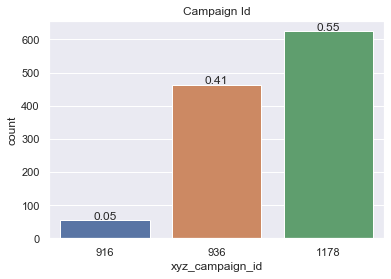

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x='xyz_campaign_id',  data=df)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title("Campaign Id")
plt.show()

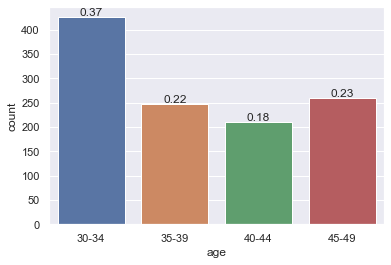

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x='age',  data=df)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

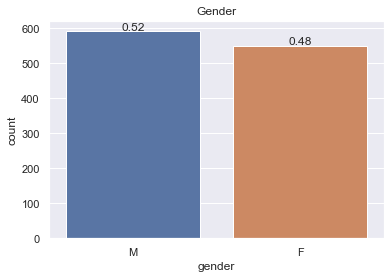

In [14]:
sns.set(style="darkgrid")
ax=sns.countplot("gender",data=df)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title("Gender")
plt.show()

* Out of 1143 advertisments 55% is from campaign id 1178, 41% is from campaign id 936 and only 5% from campaign id 1178.Therefore, the given data is biased towards campaign id 1178.
* 37% belongs to the age group 30-34,22% belongs to 35-39,18% belongs to 40-44 and 23% belongs to the age group 45-49.
* 52% are males and 48% are females.

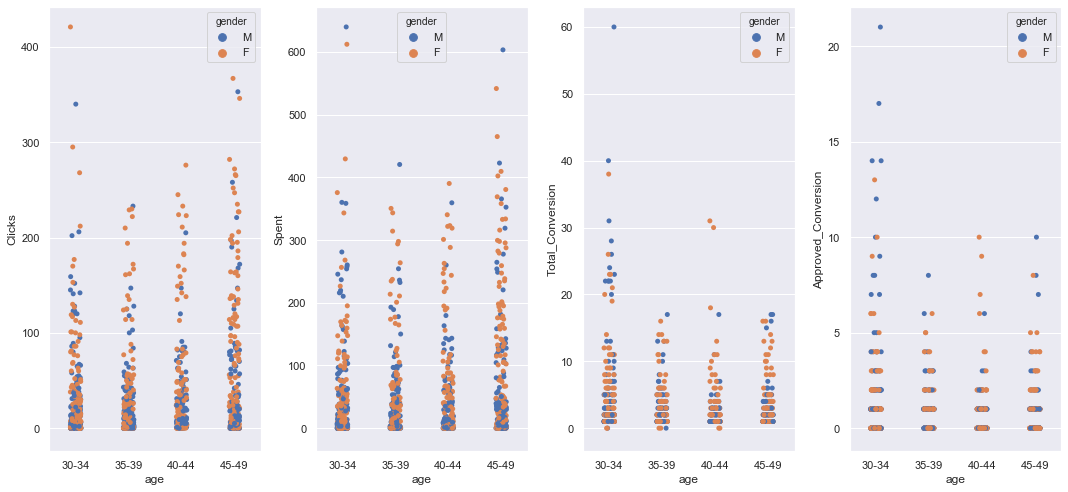

In [15]:
f,axes=plt.subplots(nrows=1,ncols=4,figsize=(15,7))

sns.stripplot(x="age", y="Clicks", hue="gender", data=df,ax=axes[0])
sns.stripplot(x="age", y="Spent", hue="gender", data=df,ax=axes[1])
sns.stripplot(x="age", y="Total_Conversion", hue="gender", data=df,ax=axes[2])
sns.stripplot(x="age", y="Approved_Conversion", hue="gender", data=df,ax=axes[3])
plt.tight_layout()

* The age group 45-49 participates the most in clicking ads whereas the least participated is the age group 35-39.Women click on ads most often.
* Most money is spent on advertisments for the age group 45-49.
* Men enquire about the product more than women.Also, age group 30-34 enquires most.
* Age group 30-34 buys the product most often. 

In [16]:
df_cid1=df.groupby("xyz_campaign_id").sum()

In [17]:
df_cid1.loc["Total"]=df_cid1.sum(axis=0)

In [18]:
df_cid1

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
xyz_campaign_id,,,,,
916,482925.0,113.0,149.710001,58.0,24.0
936,8128187.0,1984.0,2893.369999,537.0,183.0
1178,204823716.0,36068.0,55662.149959,2669.0,872.0
Total,213434828.0,38165.0,58705.229958,3264.0,1079.0


* Only 0.0017% approx of total times advertisments are shown is converted into a click.
* Only 8.5% of total clicks is converted into enquiry.
* 33% of the total enquiry is converted into sale of the product.

In [19]:
cids=[916,936,1178]
df_cid_per=pd.DataFrame(columns=["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"],index=cids)
for cid in cids:
    df_cid_per.loc[cid]=df_cid1.loc[cid]/df_cid1.loc["Total"]*100

In [20]:
df_cid_per

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
916,0.226263,0.296083,0.25502,1.77696,2.22428
936,3.80828,5.19848,4.92864,16.4522,16.9601
1178,95.9655,94.5054,94.8163,81.7708,80.8156


* Advertisments belonging to campaign id 1178 was shown 95% of the total number of times advertisments was shown(Impressions), which makes the given data set biased and unreliable to see which of the campaign is more effective.This has a considerable impact on the rest of the fields such as Click , Total_Conversion, Approved_Conversion.
* Advertisments belonging to campaign id 916 was shown only 0.2% of the total number of times advertisments was shown(Impressions).
* Advertisments belonging to campaign id 936 was shown only 3% of the total number of times advertisments was shown(Impressions).
* Also more money is spend on Campaign Id 1178

### Grouping data based on the Campaign Id

In [21]:
df_cid2=df.groupby("xyz_campaign_id")

In [22]:
df_cid916=df_cid2.get_group(916)

In [23]:
df_cid916.describe(include="all")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,54.0,54.0,54.0,54,54,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
unique,54.0,1.0,47.0,4,2,18.0,NaN,NaN,NaN,NaN,NaN
top,711764.0,916.0,104013.0,30-34,M,16.0,NaN,NaN,NaN,NaN,NaN
freq,1.0,54.0,3.0,29,35,16.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,8943.055556,2.092593,2.772407,1.074074,0.444444
std,NaN,NaN,NaN,NaN,NaN,NaN,11555.813220,3.017362,3.990071,0.264351,0.501570
min,NaN,NaN,NaN,NaN,NaN,NaN,292.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1981.750000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4443.000000,1.000000,1.450000,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,11942.250000,2.000000,3.057500,1.000000,1.000000


In [24]:
df_cid916.sum(axis=0,numeric_only=True)

Impressions            482925.000000
Clicks                    113.000000
Spent                     149.710001
Total_Conversion           58.000000
Approved_Conversion        24.000000
dtype: float64

For advertisments belonging to campaign id 916,
* 0.02% of the total times advertisments shown are clicked on.
* 51% of the advertisments clicked on are enquired on.
* 41% of the advertisments enquired on results succesful sale of product.

In [25]:
df_cid936=df_cid2.get_group(936)

In [26]:
df_cid936.describe(include="all")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,464.0,464.0,464.0,464,464,464.0,464.000000,464.000000,464.000000,464.000000,464.000000
unique,464.0,1.0,367.0,4,2,24.0,NaN,NaN,NaN,NaN,NaN
top,951294.0,936.0,110982.0,30-34,F,16.0,NaN,NaN,NaN,NaN,NaN
freq,1.0,464.0,4.0,196,256,86.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,17517.644397,4.275862,6.235711,1.157328,0.394397
std,NaN,NaN,NaN,NaN,NaN,NaN,41472.794907,10.716118,16.287179,0.524796,0.539629
min,NaN,NaN,NaN,NaN,NaN,NaN,87.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1879.750000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5589.000000,1.000000,1.385000,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,13630.500000,3.250000,4.605000,1.000000,1.000000


In [27]:
df_cid936.sum(axis=0,numeric_only=True)

Impressions            8.128187e+06
Clicks                 1.984000e+03
Spent                  2.893370e+03
Total_Conversion       5.370000e+02
Approved_Conversion    1.830000e+02
dtype: float64

For advertisments belonging to campaign id 936,
* 0.002% of the total times advertisments shown are clicked on.
* 27% of the advertisments clicked on are enquired on.
* 34% of the advertisments enquired on results succesful sale of product.

In [28]:
df_cid1178=df_cid2.get_group(1178)

In [29]:
df_cid1178.describe(include="all")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,625.0,625.0,625.0,625,625,625.0,6.250000e+02,625.000000,625.000000,625.00000,625.000000
unique,625.0,1.0,277.0,4,2,40.0,NaN,NaN,NaN,NaN,NaN
top,1121279.0,1178.0,144674.0,30-34,M,16.0,NaN,NaN,NaN,NaN,NaN
freq,1.0,625.0,6.0,201,349,38.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.277179e+05,57.708800,89.059440,4.27040,1.395200
std,NaN,NaN,NaN,NaN,NaN,NaN,3.657869e+05,67.307334,102.386480,5.67062,2.199718
min,NaN,NaN,NaN,NaN,NaN,NaN,5.264000e+03,0.000000,0.000000,0.00000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,8.704300e+04,12.000000,19.110000,1.00000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.887580e+05,31.000000,48.549999,2.00000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.369430e+05,78.000000,120.879999,5.00000,2.000000


In [30]:
df_cid1178.sum(axis=0,numeric_only=True)

Impressions            2.048237e+08
Clicks                 3.606800e+04
Spent                  5.566215e+04
Total_Conversion       2.669000e+03
Approved_Conversion    8.720000e+02
dtype: float64

For advertisments belonging to campaign id 1178,
* 0.001% of the total times advertisments shown are clicked on.
* 0.001% of the advertisments clicked on are enquired on.
* 32% of the advertisments enquired on results succesful sale of product.

## Useful Insights

* Out of 1143 advertisments 55% is from campaign id 1178, 41% is from campaign id 936 and only 5% from campaign id 1178.Therefore, the given data is biased towards campaign id 1178.
* 37% of the advertisments are targeted on the age group 30-34,22% on 35-39,18% on 40-44 and 23% on age group 45-49.
* 52% of the advertisments are targeted on men and 48% are targeted on women.
* The age group 45-49 participates the most in clicking ads whereas the least participated is the age group 35-39.Women click on ads most often.
* Most money is spent on advertisments for the age group 45-49.
* Men enquire about the product more than women.Also, age group 30-34 enquires most.
* Age group 30-34 buys the product most often. 
* Out of 213,434,828 advertisments shown only 1079 leads to sale of the product i.e, only 0.0005% of ads shown leads to a purchase.
* Advertisments belonging to xyz_campaign_id 916 is more effective from the given data since since 0.005% of the total advertisments shown in the campaign id lead to a purchasel.(Whereas it was 0.002% for 936 and 0.0004% for 1178.